In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

### Data Understanding & Data Cleaning

In [51]:
# Import Data
df = pd.read_csv('../Data/mxmh_survey_results.csv')

df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


3 Part of Data:
1. Background of respondents (10)
2. Frequency of each genre (16)
3. Ranking of mental health (4)
4. Others - survey related (2 - Timestamp & Permissions)

Target variable: Music Effects

In [52]:
# Remove Timestamp & Permissions columns 
df.drop(columns=['Timestamp', 'Permissions'], inplace=True)
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             732 non-null    object 
 9   BPM                           629 non-null    float64
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

Only 7 columns with float data type:
1. Age
2. Hours per day
3. BPM
4. Anxiety
5. Depression
6. Insomnia
7. OCD

The rest of the columns are object data type. 
1. Keep to Object: Primary streaming service, Fav genre, 
2. Converting to binary: While working, Instrumentalist, Composer, exploratory, foreign languages
3. Converting to numeric: Frequency on each genre
Music Effects?

In [54]:
# Summary Statistics for float data type
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [55]:
# Checking for missing values
df.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [56]:
# remove missing value for Music Effects & Age

columns_to_clean = ['Age', 'Music effects', 'Primary streaming service', 'While working', 'Instrumentalist', 'Foreign languages']
df.dropna(subset=columns_to_clean, inplace=True)

print(df[columns_to_clean].isnull().sum())

Age                          0
Music effects                0
Primary streaming service    0
While working                0
Instrumentalist              0
Foreign languages            0
dtype: int64


In [57]:
# BPM has many null value, will replace them with N/A
df['BPM'] = df['BPM'].fillna('NA')
print(df['BPM'].isnull().sum())

0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           718 non-null    float64
 1   Primary streaming service     718 non-null    object 
 2   Hours per day                 718 non-null    float64
 3   While working                 718 non-null    object 
 4   Instrumentalist               718 non-null    object 
 5   Composer                      718 non-null    object 
 6   Fav genre                     718 non-null    object 
 7   Exploratory                   718 non-null    object 
 8   Foreign languages             718 non-null    object 
 9   BPM                           718 non-null    object 
 10  Frequency [Classical]         718 non-null    object 
 11  Frequency [Country]           718 non-null    object 
 12  Frequency [EDM]               718 non-null    object 
 13  Frequency 

### Data Visualization

Analysis:

Single Variable Analysis:
- what are the most used in Primary streaming service
- 


- Age VS General (what is the top genre for each age group)
- Hours per day VS Music Effect
- Instrumentalist VS Music Effect
- While working VS Music Effect
- Composer VS Music Effect
- Distribution of  Music effects on Depression/Insomnia/OCD/Anxiety

Correlation Map (all variables in Background of respondents & rating of Mental Health)


### Data Pre-processing

In [59]:
# Assuming 'Category1' and 'Category2' are categorical columns
label_encoder = LabelEncoder()
df['Primary streaming service'] = label_encoder.fit_transform(df['Primary streaming service'])

df.head()


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,4,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,5,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,4,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,5,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [60]:
# Encode categories into numerical value from 0-3
mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
genre_freq_columns = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

for column in genre_freq_columns:
    df[column] = df[column].replace(mapping)

df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,4,4.0,No,No,No,Video game music,No,Yes,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,No effect
3,61.0,5,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,Improve
4,18.0,4,4.0,Yes,No,No,R&B,Yes,No,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,Improve
5,18.0,4,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,Improve
6,18.0,5,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,Improve


In [61]:
# Encode categories into numerical value from 0-3
mapping = {'No': 0, 'Yes': 1}
binary_categorical_columns = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']

for column in binary_categorical_columns:
    df[column] = df[column].replace(mapping)

df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,4,4.0,0,0,0,Video game music,0,1,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,No effect
3,61.0,5,2.5,1,0,1,Jazz,1,1,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,Improve
4,18.0,4,4.0,1,0,0,R&B,1,0,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,Improve
5,18.0,4,5.0,1,1,1,Jazz,1,1,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,Improve
6,18.0,5,3.0,1,1,0,Video game music,1,1,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,Improve


In [14]:
df['Music effects'] = df['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})

df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,4,4.0,0,0,0,Video game music,0,1,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,0
3,61.0,5,2.5,1,0,1,Jazz,1,1,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,1
4,18.0,4,4.0,1,0,0,R&B,1,0,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,1
5,18.0,4,5.0,1,1,1,Jazz,1,1,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,1
6,18.0,5,3.0,1,1,0,Video game music,1,1,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,1


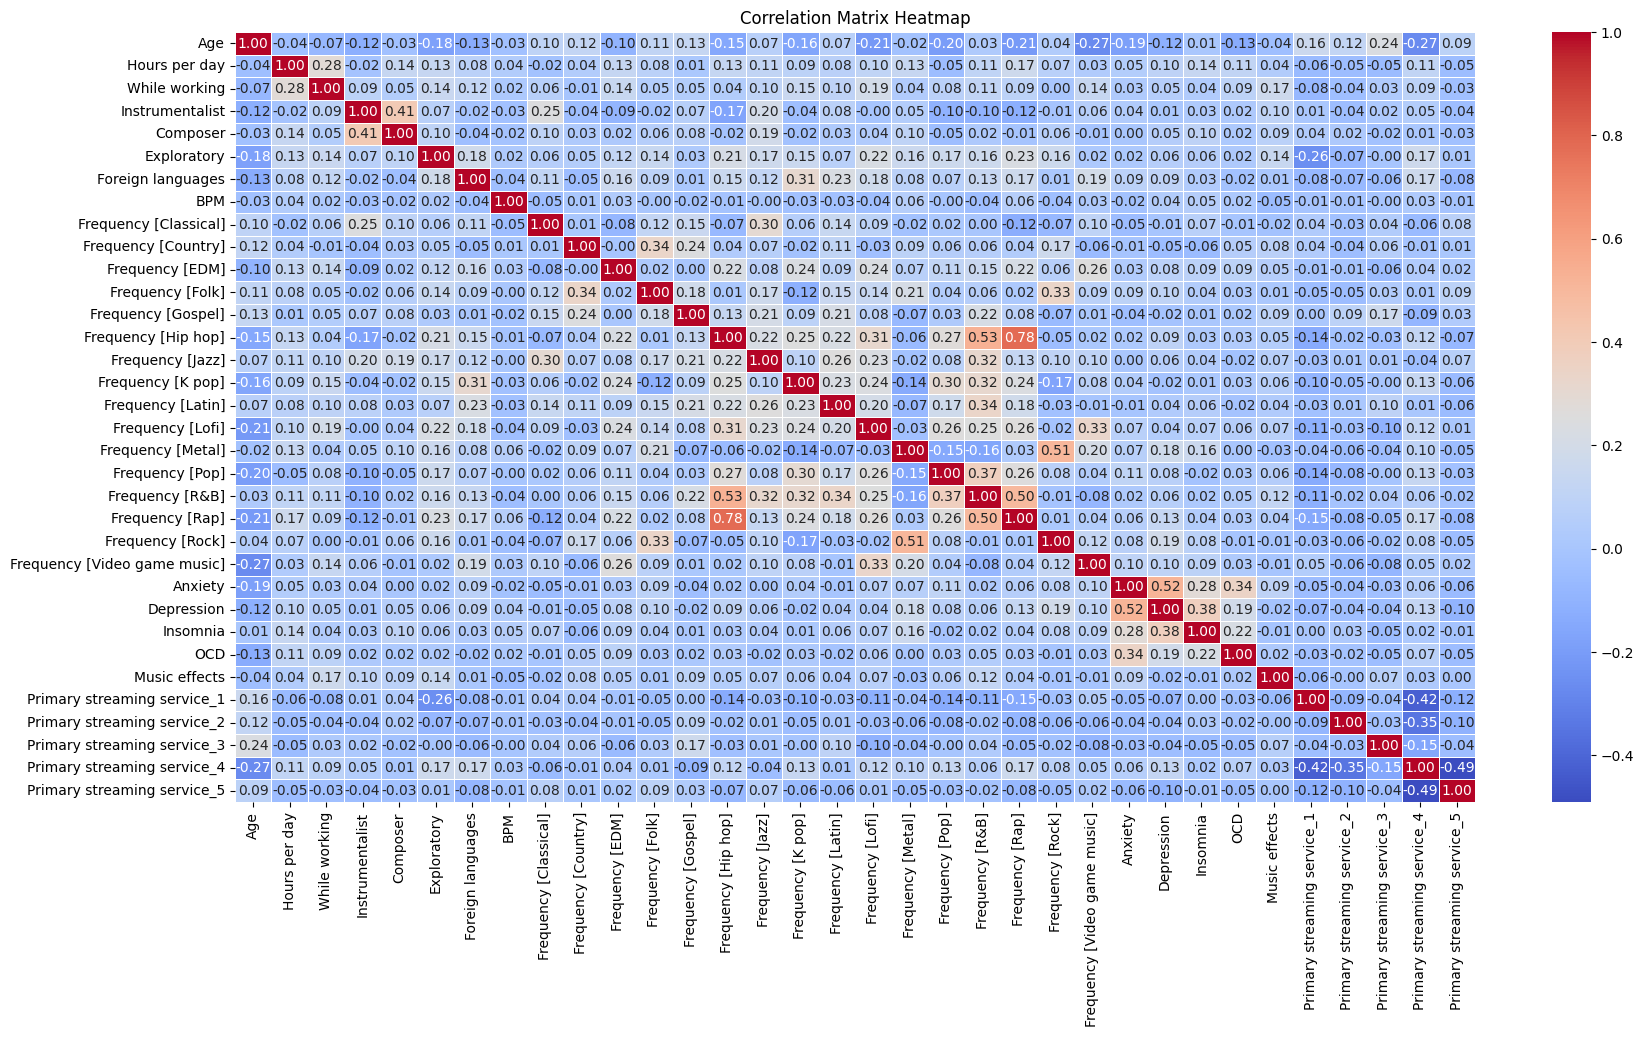

In [15]:
# Apply one-hot encoding to the unordered categorical column
df_encoded = pd.get_dummies(df, columns=['Primary streaming service'], drop_first=True)

# Replace 'NA' strings with NaN in the specific column, assume the column is named 'ColumnWithNA'
df_encoded['BPM'].replace('NA', np.nan, inplace=True)

# Calculate the median for the specific column and fill NaNs with this median
median_value = df_encoded['BPM'].median()
df_encoded['BPM'] = df_encoded['BPM'].fillna(median_value)

# Drop a column you want to exclude from correlation analysis
df_encoded.drop('Fav genre', axis=1, inplace=True)

# Calculating the correlation matrix
corr_matrix = df_encoded.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Modelling Process:
1. Preprocess the data
     - Normalizations/Standardlization
     - Encoding Categorical Variable 
     (One-hot encoding for nominal data & Ordinal encoding for ordinal data)

2. Split Data (Train/Test/Validate)

3. Neural Network 
     - which pre-trained model 
     - number of layers needed
     - number of neurons in each layer
     - activation functions to use in each layer

4. Compile the Model
     - Loss function
     - Optimizer
     - Metrics

5. Training the model
     - Adjusting weights
     - Number of epochs
     - Batch size

### Modelling Pre-Process

Only comparing Genre Freuqency data VS Music Effect for first model using CNN

Transform genre frquency data into grid 
1. Encode categories into numerical value from 0-3
2. Calculate Spearman's Rank-Oder correlation for each pair of genres
3. Transform the correltaion matrix into a grid (16x16, with value of -1 to 1)
4. Heatmap Visualization (Optional)

CNN model
1. Input: 16x16 grid
2. ReLu Activation Function
3. Number of layers needed

In [16]:
df_encoded.reset_index(drop=True, inplace=True)

# Selecting the 'Frequency of genres' columns (as columns of the grid)
genre_columns = df_encoded.filter(like='Frequency').columns

# Selecting the rest of the columns (as rows of the grid)
other_columns = df_encoded.drop(columns=genre_columns)

# Initializing an empty list to store the grids for each row
grids = []

# Ensure that both DataFrames are aligned and have the same number of rows
assert len(other_columns) == len(df_encoded[genre_columns]), "DataFrames must have the same length"

# Multiplying each row by each 'Frequency of genre' column to create a grid for each row
for index in range(len(other_columns)):
    row1 = other_columns.iloc[index]
    row2 = df_encoded[genre_columns].iloc[index]
    grid = np.outer(row1, row2)
    grids.append(grid)

In [24]:
'''
# Define the CNN model
model = Sequential([
    # Convolutional layer: you might want to tweak the number of filters, kernel size, activation function, etc.
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(10, 50, 1)),
    # More layers could be added here, such as additional convolutional layers, pooling layers, etc.
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Final layer: since this is a regression problem (I assume, because 'Music effects' is numerical), one output neuron
    Dense(1, activation='linear')  # For classification, use 'softmax' activation and adjust the number of neurons to match the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # For classification, use 'categorical_crossentropy' as loss
'''

"\n# Define the CNN model\nmodel = Sequential([\n    # Convolutional layer: you might want to tweak the number of filters, kernel size, activation function, etc.\n    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(10, 50, 1)),\n    # More layers could be added here, such as additional convolutional layers, pooling layers, etc.\n    Flatten(),\n    Dense(128, activation='relu'),\n    Dropout(0.5),\n    # Final layer: since this is a regression problem (I assume, because 'Music effects' is numerical), one output neuron\n    Dense(1, activation='linear')  # For classification, use 'softmax' activation and adjust the number of neurons to match the number of classes\n])\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='mse', metrics=['mae'])  # For classification, use 'categorical_crossentropy' as loss\n"

In [25]:
grid_array = np.random.rand(718, 18, 16, 1) 
labels = np.random.randint(0, 10, size=(718,))

In [26]:
from sklearn.model_selection import train_test_split

train_grids, temp_grids, train_labels, temp_labels = train_test_split(
    grid_array, labels, test_size=0.2, random_state=42)

val_grids, test_grids, val_labels, test_labels = train_test_split(
    temp_grids, temp_labels, test_size=0.5, random_state=42)

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(18, 16, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to check the architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 18, 16, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 8, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [30]:
# Train the model
history = model.fit(train_grids, train_labels, epochs=30, validation_data=(val_grids, val_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_grids, test_labels)
print(f"Test accuracy: {test_acc}")

Epoch 1/30
18/18 [==============================] - 0s 9ms/step - loss: 2.1809 - accuracy: 0.3345 - val_loss: 2.3239 - val_accuracy: 0.1250
Epoch 2/30
18/18 [==============================] - 0s 8ms/step - loss: 2.0889 - accuracy: 0.2735 - val_loss: 2.2958 - val_accuracy: 0.1111
Epoch 3/30
18/18 [==============================] - 0s 8ms/step - loss: 1.9297 - accuracy: 0.3676 - val_loss: 2.3878 - val_accuracy: 0.0556
Epoch 4/30
18/18 [==============================] - 0s 8ms/step - loss: 1.7346 - accuracy: 0.4739 - val_loss: 2.4755 - val_accuracy: 0.0972
Epoch 5/30
18/18 [==============================] - 0s 9ms/step - loss: 1.4766 - accuracy: 0.5523 - val_loss: 2.5056 - val_accuracy: 0.0833
Epoch 6/30
18/18 [==============================] - 0s 8ms/step - loss: 1.2154 - accuracy: 0.6254 - val_loss: 2.7651 - val_accuracy: 0.0556
Epoch 7/30
18/18 [==============================] - 0s 8ms/step - loss: 0.9719 - accuracy: 0.7613 - val_loss: 2.9488 - val_accuracy: 0.0833
Epoch 8/30
18/18 [==

### Using Feature Vector 

In [89]:
df_transformed = df.copy()

In [90]:
# One-hot encode the 'Music Effects' in the copied DataFrame
df_transformed = pd.get_dummies(df_transformed, columns=['Music effects'], prefix='ME')

df_transformed.drop('Fav genre', axis=1, inplace=True)

In [91]:
df_transformed['BPM'].replace('NA', np.nan, inplace=True)

median_value = df_transformed['BPM'].median()
df_transformed['BPM'] = df_transformed['BPM'].fillna(median_value)

In [92]:
# Normalize numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
df_transformed[numeric_columns] = scaler.fit_transform(df_transformed[numeric_columns])

In [93]:
X = df_transformed.drop(['ME_Worsen', 'ME_No effect', 'ME_Improve'], axis=1)
y = df_transformed[['ME_Worsen', 'ME_No effect', 'ME_Improve']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
for col in X_train.columns:
    if X_train[col].dtype in ['int64', 'float64']:
        X_train[col] = X_train[col].astype(float)

In [95]:
y_train = y_train.astype(int)


In [96]:
print(X_train.dtypes)
print(y_train.dtypes)

Age                             float64
Primary streaming service         int32
Hours per day                   float64
While working                   float64
Instrumentalist                 float64
Composer                        float64
Exploratory                     float64
Foreign languages               float64
BPM                             float64
Frequency [Classical]           float64
Frequency [Country]             float64
Frequency [EDM]                 float64
Frequency [Folk]                float64
Frequency [Gospel]              float64
Frequency [Hip hop]             float64
Frequency [Jazz]                float64
Frequency [K pop]               float64
Frequency [Latin]               float64
Frequency [Lofi]                float64
Frequency [Metal]               float64
Frequency [Pop]                 float64
Frequency [R&B]                 float64
Frequency [Rap]                 float64
Frequency [Rock]                float64
Frequency [Video game music]    float64


In [102]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Adjust as necessary
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Output layer for the three classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
15/15 [==============================] - 1s 20ms/step - loss: 0.7259 - accuracy: 0.7146 - val_loss: 0.5795 - val_accuracy: 0.7652
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6803 - accuracy: 0.7298 - val_loss: 0.5778 - val_accuracy: 0.7652
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6572 - accuracy: 0.7364 - val_loss: 0.5703 - val_accuracy: 0.7652
Epoch 4/20
15/15 [==============================] - 0s 6ms/step - loss: 0.6406 - accuracy: 0.7386 - val_loss: 0.5738 - val_accuracy: 0.7652
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6257 - accuracy: 0.7429 - val_loss: 0.5602 - val_accuracy: 0.7652
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6148 - accuracy: 0.7451 - val_loss: 0.5515 - val_accuracy: 0.7652
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6042 - accuracy: 0.7516 - val_loss: 0.5599 - val_accuracy: 0.7652
Epoch 8/20
15/15 [=

In [103]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 80.84%
Test Accuracy: 75.00%


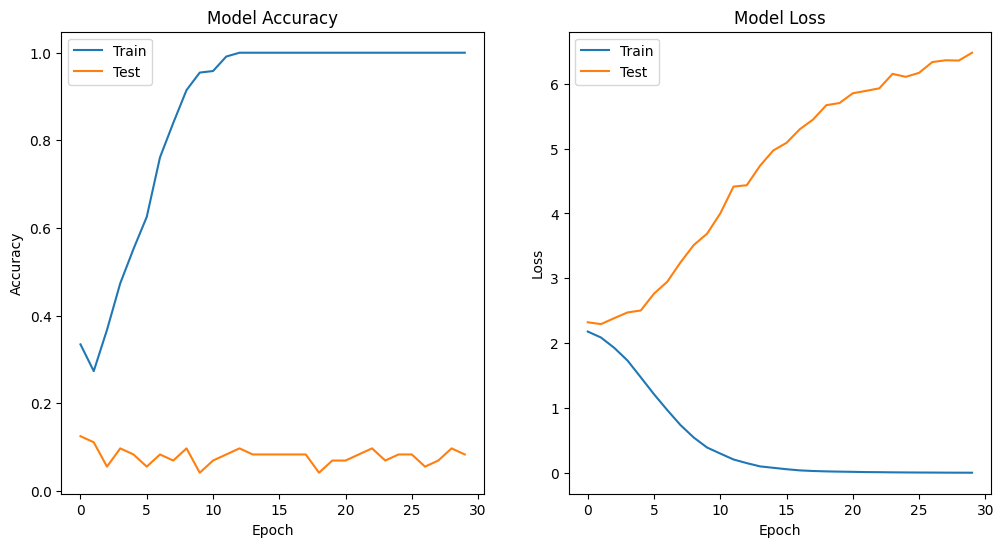

In [104]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [109]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming y_train and y_test are one-hot encoded
y_train_indices = torch.argmax(y_train_tensor, dim=1)
y_test_indices = torch.argmax(y_test_tensor, dim=1)

# Update the TensorDataset to use class indices
train_dataset = TensorDataset(X_train_tensor, y_train_indices)
test_dataset = TensorDataset(X_test_tensor, y_test_indices)

# Recreate the DataLoader with the updated datasets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [112]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 128)  # Adjust the input size to match the number of features
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 16)  # Assuming 16 genres to score
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # No activation, raw scores for BCEWithLogitsLoss
        return x

model = MLP()


In [107]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def train(model, loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        for data, targets in loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

train(model, loader, criterion, optimizer)


Epoch 1, Train Loss: 0.7787
Epoch 2, Train Loss: 0.6581
Epoch 3, Train Loss: 0.6315
Epoch 4, Train Loss: 0.6205
Epoch 5, Train Loss: 0.6157
Epoch 6, Train Loss: 0.6073
Epoch 7, Train Loss: 0.6041
Epoch 8, Train Loss: 0.5959
Epoch 9, Train Loss: 0.5849
Epoch 10, Train Loss: 0.5852
Epoch 11, Train Loss: 0.5686
Epoch 12, Train Loss: 0.5617
Epoch 13, Train Loss: 0.5505
Epoch 14, Train Loss: 0.5397
Epoch 15, Train Loss: 0.5361
Epoch 16, Train Loss: 0.5180
Epoch 17, Train Loss: 0.5093
Epoch 18, Train Loss: 0.4956
Epoch 19, Train Loss: 0.4864
Epoch 20, Train Loss: 0.4729


In [111]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Evaluate the model
test_accuracy = evaluate_model(model, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 72.92%


Survey on categorical data for neural networks
https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00305-w
